##Question 1 - Anything you can say what this dataset is about

##Answer:
This dataset captures player participation in game matches. The dataset tells us:
*   Which player (PLAYERID) played in which match (MATCHID)
*   Which team they were on (TEAM)
*   How long the match lasted (DURATION in seconds?)
*   Whether they won or lost (VICTORY)
*   Match date (MATCHDATEID)
*   Whether they are still an active player at the time of extraction of this dataset (STILL_ACTIVE)

This can be used to analyze player performance, win/loss statistics, churn prediction.

In [1]:
# Load the data
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Ubisoft_Project/player_match_sample.csv')

df.head(10)

Mounted at /content/drive


,PLAYERID,MATCHID,TEAM,DURATION,VICTORY,MATCHDATEID,STILL_ACTIVE
0,11664,290014,B,1344319,1,20250804,True
1,12905,234898,A,1326880,0,20250804,False
2,14122,171447,B,2107402,1,20250804,False
3,14217,248885,B,1027924,0,20250804,True
4,13799,199453,A,1308102,0,20250804,True
5,10943,187185,B,2689682,1,20250804,True
6,14559,69451,A,1743721,0,20250804,False
7,13615,84213,B,2172422,1,20250804,True
8,15384,149692,B,1255799,1,20250804,True
9,15607,376709,A,1757775,1,20250804,False


##Question 2 - What the dataset tells you about the game matches
##Answer: Findings:

1.   There are some cases where the same player appears twice within the same match. All other columns take the same value, however the MATCHDATEID differs by 1 day.This can happen when a player disconnects and then reconnects to the same match. Which creates mutiple logs for the same player in the same match.
2.   Most matches in theis data sample have only 1 player recorded (check distribution below). Maybe becasue this is only a sample and it doesn't have the complete match history.There are some games with 10 --> 5v5 (max=12 players).

Conclusion: Based on these observations, I would treat this dataset as player-centric rather than match-centric. It does not appear to contain full match data. Instead, it looks like a sample of players drawn from the match history. As a result, matches do not necessarily include all participants but only a subset of players is represented in the dataset.



##Question 3 - How would you asses data quality ? Any anomaly or outlier you can detect
##Answer:

*   No missing values found.
*   No duplicate rows.
### Validate each column
*   PLAYERID: Appears in many rows --> this is normal because each player participates in multiple matches.
*   MATCHID: Each match ID appears multiple times, which is expected because multiple players play the same match. Some MATCHID values appear only once?? This is suspicious, because I would think a match should have at least 2 players. However, this is just partial sample of the data, so it may not have the complete logs of each match.
*   VICTORY: Wins/losses appear almost balanced in this dataset.
*   TEAM: Teams: A, B, and a rare value X (only 749 rows). Team X is suspicious, could this indicate a data issue or something else?
*   STILL_ACTIVE: Two values True/False. Majority is TRUE=still active
*   DURATION: The match durations vary significantly. This feature has extremely large values for a "match duration". Considering that the duration is in seconds, then we have the mean= 1,594,243 seconds ~18 days, which is suspicious, but if we consider that maybe those are maybe multi-day gaming sessions or tournaments that span several days then that can be explained.Maybe player time spent in-game across multiple rounds. However, the maximum isn't realistic at all Max = 25,460,966,705 seconds ~294687 days. This is a likely data quality issue. Or is the unit maybe milliseconds??


In [2]:
# Missing values
df.isna().sum()

,0
PLAYERID,0
MATCHID,0
TEAM,0
DURATION,0
VICTORY,0
MATCHDATEID,0
STILL_ACTIVE,0


In [3]:
print(len(df))
# Duplicate rows
df.duplicated().sum()
df1 = df.drop_duplicates()
len(df1)

655722


655722

In [ ]:
df.describe(include='all')

,PLAYERID,MATCHID,TEAM,DURATION,VICTORY,MATCHDATEID,STILL_ACTIVE
count,655722.000000,655722.000000,655722,6.557220e+05,655722.000000,6.557220e+05,655722
unique,NaN,NaN,3,NaN,NaN,NaN,2
top,NaN,NaN,A,NaN,NaN,NaN,True
freq,NaN,NaN,336824,NaN,NaN,NaN,511664
mean,13185.740489,274088.281709,NaN,1.594244e+06,0.503277,2.025082e+07,NaN
std,1824.132891,156573.861552,NaN,9.952601e+07,0.499990,1.666168e+01,NaN
min,10001.000000,1000.000000,NaN,0.000000e+00,0.000000,2.025080e+07,NaN
25%,11622.000000,138355.250000,NaN,7.913800e+05,0.000000,2.025081e+07,NaN
50%,13208.000000,274523.500000,NaN,1.133075e+06,1.000000,2.025082e+07,NaN
75%,14738.000000,408908.750000,NaN,1.517532e+06,1.000000,2.025082e+07,NaN


In [11]:
df['STILL_ACTIVE'].value_counts()

,count
STILL_ACTIVE,
True,511664
False,144058


In [ ]:
df['PLAYERID'].value_counts()

,count
PLAYERID,
13261,1066
10931,792
12567,724
12193,684
13068,589
...,...
14946,1
10087,1
11964,1


In [ ]:
df['MATCHID'].value_counts()

,count
MATCHID,
490416,12
182247,11
67021,11
199525,10
184017,10
...,...
106195,1
533582,1
124610,1


In [9]:
df[['MATCHID', 'PLAYERID']].value_counts()
# This shows how many times each player aappears in each match, it looks like there are some players that appear twice in the same match?
#This can be happening because the player got disconnected and rejoined the match.

MATCHID  PLAYERID
218268   10941       2
401916   11746       2
300268   11973       2
199751   14308       2
266348   13531       2
                    ..
184036   14142       1
184037   13154       1
         15182       1
184038   10415       1
184033   14251       1
Name: count, Length: 655717, dtype: int64

MATCHID
1000      1
1001      1
1002      1
1003      1
1004      1
         ..
543650    2
543651    2
543652    2
543653    2
543654    2
Name: PLAYERID, Length: 542655, dtype: int64
count    542655.000000
mean          1.208350
std           0.574148
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: PLAYERID, dtype: float64
MATCHID
345985     1
345999     1
345998     1
345997     1
345996     1
          ..
200653    10
507778    10
67021     11
182247    11
490416    12
Name: PLAYERID, Length: 542655, dtype: int64


<Axes: >

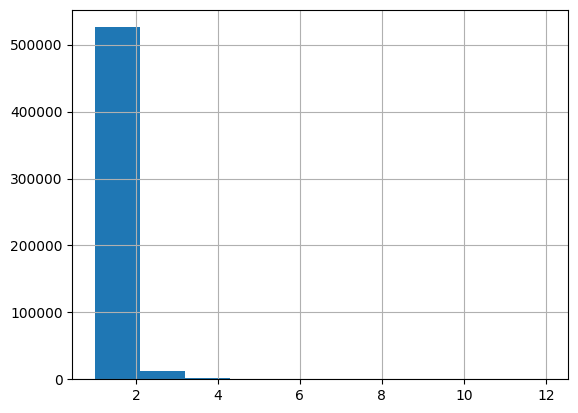

In [8]:
#count how many players per match
players_per_match = df.groupby('MATCHID')['PLAYERID'].nunique()
print(players_per_match)
#check the distribution
print(players_per_match.describe())
#identify matches with abnormal player counts - it looks like there are multiple matches with 1 unique player.
#this can be because this dataset is only a smaple of the overall data and it doesn't have the complete match history. So, many matches appear incomplete?
print(df.groupby('MATCHID')['PLAYERID'].nunique().sort_values())
players_per_match.hist()

In [40]:
#identify players that appear multiple times in same match
dup = df[df.duplicated(subset=['PLAYERID', 'MATCHID'], keep=False)].sort_values(['PLAYERID', 'MATCHID'])
print(len(dup))
print(dup)

#it looks like the duplicates agree on team/victory which is good. So we can drop one of these and keep only one

10
        PLAYERID  MATCHID TEAM  DURATION  VICTORY  MATCHDATEID  STILL_ACTIVE
237431     10941   218268    A   1885687        0     20250821          True
467935     10941   218268    A   1885687        0     20250820          True
206764     11746   401916    A   1249937        0     20250809          True
386534     11746   401916    A   1249937        0     20250808          True
51781      11973   300268    B   2180318        0     20250806          True
109178     11973   300268    B   2180318        0     20250805          True
474188     13531   266348    A   1837650        0     20250810          True
485253     13531   266348    A   1837650        0     20250809          True
68705      14308   199751    A   1599815        0     20250822         False
147946     14308   199751    A   1599815        0     20250821         False


In [ ]:
df['VICTORY'].value_counts()

,count
VICTORY,
1,330010
0,325712


In [ ]:
df['TEAM'].value_counts()

,count
TEAM,
A,336824
B,318149
X,749


In [19]:
#Check Duration outliers
#calculate the interquartile range
Q1 = df['DURATION'].quantile(0.25)
Q3 = df['DURATION'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['DURATION'] > upper_bound) | (df['DURATION'] < lower_bound)]
print(outliers)

        PLAYERID  MATCHID TEAM  DURATION  VICTORY  MATCHDATEID  STILL_ACTIVE
5          10943   187185    B   2689682        1     20250804          True
140        12397   248752    A   2615022        1     20250824         False
446        10283    92398    B   2628702        0     20250810          True
469        14338   227858    A   2817052        1     20250810          True
543        13966   256087    A   2651972        0     20250819          True
...          ...      ...  ...       ...      ...          ...           ...
655475     11237   179850    A   2818561        0     20250824          True
655548     11413   285372    A   2761710        1     20250826          True
655593     13493   362454    A   2669671        1     20250828          True
655598     15399   497884    B   2791390        1     20250828          True
655703     14508   152104    A   2833712        1     20250831          True

[3289 rows x 7 columns]


In [23]:
#Which players play the most matches? it looks like there is a player that plaed 1066 game???
print(df['PLAYERID'].value_counts().describe())
print(df['PLAYERID'].value_counts().head())

count    6383.000000
mean      102.729438
std        83.717249
min         1.000000
25%        42.000000
50%        83.000000
75%       140.000000
max      1066.000000
Name: count, dtype: float64
PLAYERID
13261    1066
10931     792
12567     724
12193     684
13068     589
Name: count, dtype: int64


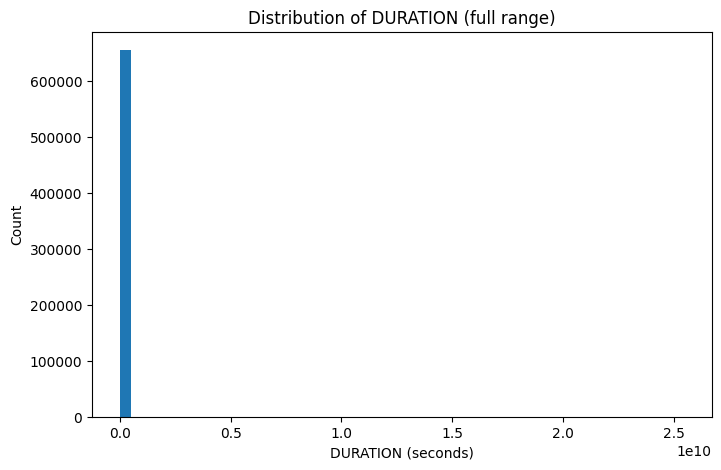

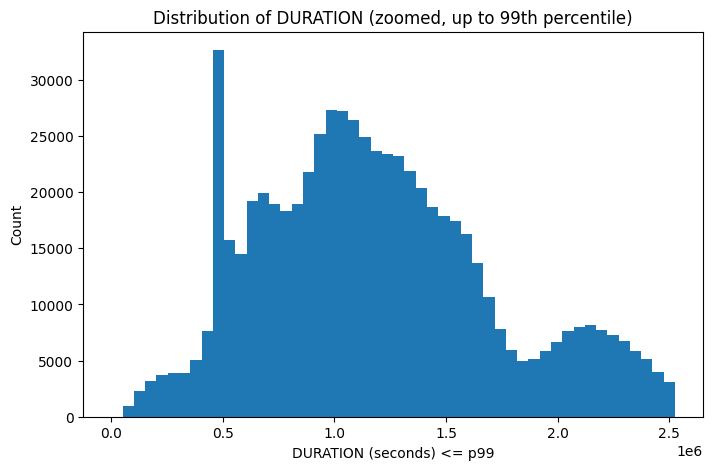

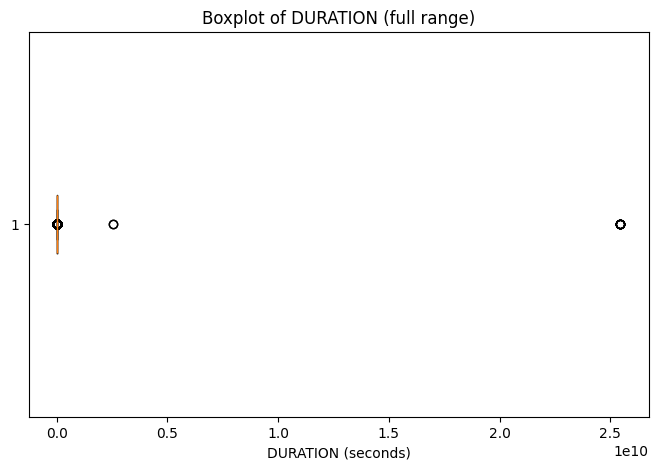

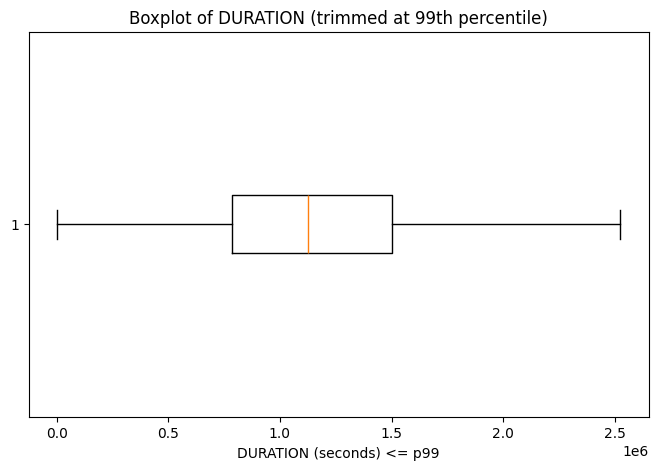

In [34]:
#The visualizations show a very heavy right tail in DURATION with some unrealistically high values, indicating a data-quality issue
#or a different interpretation of this field.

#Histogram of all durations
plt.figure()
plt.hist(df["DURATION"], bins=50)
plt.xlabel("DURATION (seconds)")
plt.ylabel("Count")
plt.title("Distribution of DURATION (full range)")
plt.show()
# Zoom in
p99 = df["DURATION"].quantile(0.99)
plt.figure()
plt.hist(df["DURATION"][df["DURATION"] <= p99], bins=50)
plt.xlabel(f"DURATION (seconds) <= p99")
plt.ylabel("Count")
plt.title("Distribution of DURATION (zoomed, up to 99th percentile)")
plt.show()

# Boxplot to highlight outliers
plt.figure()
plt.boxplot(df["DURATION"], vert=False, showfliers=True)
plt.xlabel("DURATION (seconds)")
plt.title("Boxplot of DURATION (full range)")
plt.show()

#Boxplot after trimming extremes
plt.figure()
plt.boxplot(df["DURATION"][df["DURATION"] <= p99], vert=False, showfliers=True)
plt.xlabel(f"DURATION (seconds) <= p99")
plt.title("Boxplot of DURATION (trimmed at 99th percentile)")
plt.show()

In [35]:
extreme_rows = df[df["DURATION"] > p99]

print("Number of extreme DURATION values:", len(extreme_rows))
extreme_rows.head()

Number of extreme DURATION values: 6558


,PLAYERID,MATCHID,TEAM,DURATION,VICTORY,MATCHDATEID,STILL_ACTIVE
5,10943,187185,B,2689682,1,20250804,True
140,12397,248752,A,2615022,1,20250824,False
446,10283,92398,B,2628702,0,20250810,True
469,14338,227858,A,2817052,1,20250810,True
522,13887,422231,B,2557867,0,20250819,True


##Q4: Compute all players win lose ratio and display distribution

##Answer:
The histogram of win ratios across all players shows that:

1. Most players have win ratios between 0.40 and 0.60, with a peak around ~0.5.This suggests that matches are generally well-balanced with a normal variability in player performance.

2. Only a small number of players have win ratios close to 0 or 1. These could be new players with very few matches(or highly unskilled players) and highly skilled

I looked into the relationship between experience (total number of matches) and the win ratio (scatter plot below) and I observed that:
1. there is hih variability among the low-experience players. Dor players with <100 matches, the win ratios are spread everywhere.
2. As experience increases (more matches), the win ratios converge towards ~0.5

I also checked the win rate by team (the bar plot below), and I see that the average win rate for team A and Team B is almost the same ~0.5, which can indicate that the team assignment is fair. However, the team X is rare and appears to have 0 wins?

In [41]:
# Sort first (so we control which row is kept: here we keep the earliest MATCHDATEID)
df_sorted = df.sort_values(['PLAYERID', 'MATCHID', 'MATCHDATEID'])

# Drop duplicates so each player-match combo appears only once
df_clean = df_sorted.drop_duplicates(subset=['PLAYERID', 'MATCHID'], keep='first')

print("Original rows:", len(df))
print("Rows after removing duplicates:", len(df_clean))

Original rows: 655722
Rows after removing duplicates: 655717


In [42]:
# Compute wins and losses per player
player_stats = df_clean.groupby('PLAYERID').agg(
    wins=('VICTORY','sum'),
    losses=('VICTORY', lambda x: (1 - x).sum()),
    total_matches=('VICTORY','count')
)

# Win ratio
player_stats['win_ratio'] = player_stats['wins'] / player_stats['total_matches']
player_stats.head()

,wins,losses,total_matches,win_ratio
PLAYERID,,,,
10001,65,44,109,0.596330
10002,64,65,129,0.496124
10003,69,103,172,0.401163
10004,55,28,83,0.662651
10005,142,223,365,0.389041


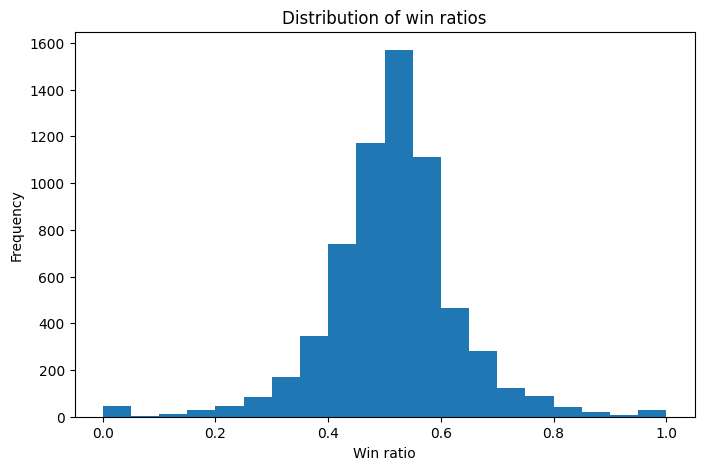

In [43]:
#Distribution plot
plt.hist(player_stats['win_ratio'], bins=20)
plt.title("Distribution of win ratios")
plt.xlabel("Win ratio")
plt.ylabel("Frequency")
plt.show()

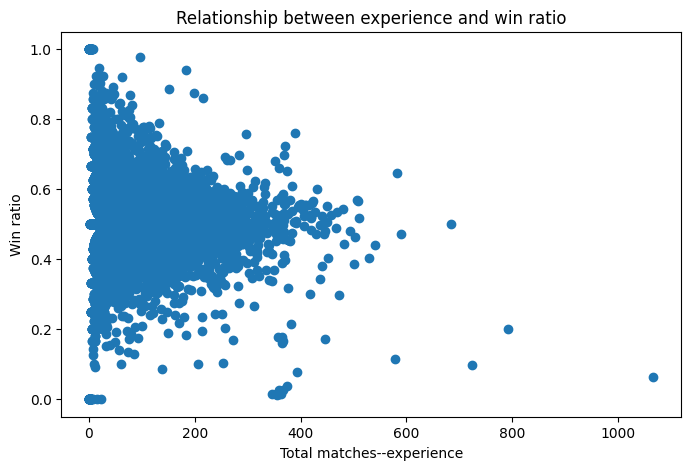

In [48]:
# Scatter plot: experience vs performance
plt.figure()
plt.scatter(player_stats['total_matches'], player_stats['win_ratio'])
plt.xlabel('Total matches--experience')
plt.ylabel('Win ratio')
plt.title('Relationship between experience and win ratio')
plt.show()

TEAM
A    0.500469
B    0.507443
X    0.000000
Name: VICTORY, dtype: float64


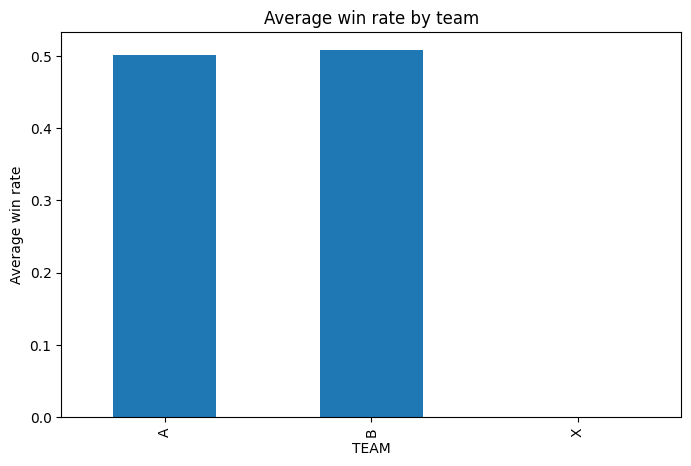

In [51]:
# Compare win ratios by team
team_winrate = df_clean.groupby('TEAM')['VICTORY'].mean()
print(team_winrate)

plt.figure()
team_winrate.plot(kind='bar')
plt.ylabel('Average win rate')
plt.title('Average win rate by team')
plt.show()

##Q5: Compute all players max defeat and victory in a row

##Answer:
The distributions of max win streaks and loss streaks are very similar for most players:

* Both have median values around 5-6
* Both have upper quartile around 7. Both have a concentrated distribution near the lower numbers

For the vast majority of players, the game does not allow extreme long streaks in either direction.

However, the maximum loss streak is 343 which is extremely abnormal and can indicate some data anomaly. (343 consecutive losses??)

In [52]:
# Sort by player and date
df_sorted = df_clean.sort_values(['PLAYERID','MATCHDATEID'])

def compute_streaks(x):
    victories = x['VICTORY'].values
    max_win = 0
    max_loss = 0
    cur_win = 0
    cur_loss = 0

    for v in victories:
        if v == 1:
            cur_win += 1
            max_win = max(max_win, cur_win)
            cur_loss = 0
        else:
            cur_loss += 1
            max_loss = max(max_loss, cur_loss)
            cur_win = 0
    return pd.Series({'max_win_streak': max_win, 'max_loss_streak': max_loss})

streaks = df_sorted.groupby('PLAYERID').apply(compute_streaks)
streaks.head()


/tmp/ipython-input-2785810315.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  streaks = df_sorted.groupby('PLAYERID').apply(compute_streaks)


,max_win_streak,max_loss_streak
PLAYERID,,
10001,9,6
10002,5,6
10003,3,11
10004,8,4
10005,7,12


In [55]:
print(streaks['max_win_streak'].describe())
print(streaks['max_loss_streak'].describe())

count    6383.000000
mean        6.098230
std         3.082319
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        49.000000
Name: max_win_streak, dtype: float64
count    6383.000000
mean        6.238133
std        11.481868
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max       343.000000
Name: max_loss_streak, dtype: float64


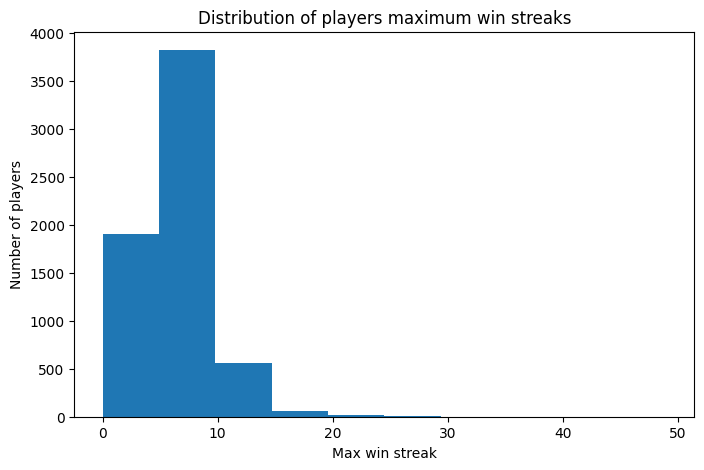

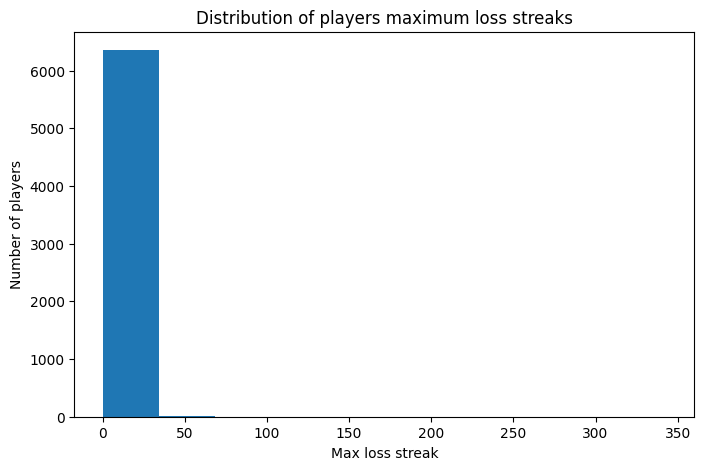

In [60]:
#Histogram of max win streaks
plt.figure(figsize=(8,5))
plt.hist(streaks['max_win_streak'])
plt.xlabel('Max win streak')
plt.ylabel('Number of players')
plt.title('Distribution of players maximum win streaks')
plt.show()

# Histogram of max loss streaks
plt.figure(figsize=(8,5))
plt.hist(streaks['max_loss_streak'])
plt.xlabel('Max loss streak')
plt.ylabel('Number of players')
plt.title('Distribution of players maximum loss streaks')
plt.show()

##Q6: Compute other players features you think are relevant and keep all players features in a dataframe

##Answer:
I added these features:
1. average match duration:shows typical playstyle
2. duration standard deviation:This measures how consistent a player's match lengths are. Can highlight consistency or anomalies
3. days active: measures long-term engagement rather than raw volume of matches
4. still_active:helps distinguish between retained versus churned players.

In [58]:
# Merge features together
final_features = player_stats.join(streaks)

# average duration
avg_duration = df_clean.groupby('PLAYERID')['DURATION'].mean().rename('avg_duration')
final_features = final_features.join(avg_duration)
# standard deviation duration
duration_std = df_clean.groupby('PLAYERID')['DURATION'].std().rename('duration_std')
final_features = final_features.join(duration_std)

#days active
days_active = df_clean.groupby('PLAYERID')['MATCHDATEID'].nunique().rename('days_active')
final_features = final_features.join(days_active)

# Add still_active
active = df_clean.groupby('PLAYERID')['STILL_ACTIVE'].max()
final_features = final_features.join(active)

final_features.head()


,wins,losses,total_matches,win_ratio,max_win_streak,max_loss_streak,avg_duration,duration_std,days_active,STILL_ACTIVE
PLAYERID,,,,,,,,,,
10001,65,44,109,0.596330,9,6,1.063395e+06,562534.816429,18,False
10002,64,65,129,0.496124,5,6,1.541999e+06,457633.552979,23,True
10003,69,103,172,0.401163,3,11,1.046807e+06,535616.138022,26,True
10004,55,28,83,0.662651,8,4,1.532930e+06,516914.016423,8,True
10005,142,223,365,0.389041,7,12,6.489016e+05,371897.262906,23,True


##Question7: Based on the players features computed, can you think of a method to predict the 'still_active' one (explain what you would do, no need to write  working code)

##Answer:
I would treat 'STILL_ACTIVE' as a binary classification problem and use the player-level features to predict whether a player is active or has churned. The features we computed (wins, losses, total matches, win ratio, max win/loss streaks, average match duration, duration variability, and days active) provide behavioral and engagement signals that are typically strong predictors of churn (or retention). A model like Logistic Regression(simple & interpretable, good for a first baseline model), Random Forest, or XGBoost (handles nonlinear relationships and can capture interactions between features) could be trained on these features to learn patterns of active vs inactive players. First, I would split the dataset into train/test sets. Then, train the model using the player feature dataset. Evaluate with classification metrics such as: Accuracy, ROC-AUC, Precision/Recall, F1 score. Finally, to interpret the results I would look at feature importance. This tells us which elements of player behavior most influence retention.

##Question8: How would you analyse players features importance for still_active predictor (explain what you would do, no need to write  working code)
##Answer:
To analyse feature importance for predicting still_active, I would use the model's (classification model mentioned/trained above) built-in feature importance scores to see which player features have the strongest impact on retention. These models naturally produce feature importance scores that show which variables contribute most to predicting whether a player remains active.

For example, the importance signals I would expect:
* days_active: strong indicator of engagement
* max_loss_streak:long losing streaks can drive churn
* win_ratio: unstable performance may correlate with quitting

To go beyond simple importance scores, I would apply SHAP (SHapley Additive exPlanations). Global SHAP summary plot tells which features consistently push predictions higher or lower across all players.

I would complement this with EDA such as correlation analysis by looking at Pearson/Spearman correlations between each feature and the still_active label (this can be done in the beginning before modelling to have an overall idea).Distribution comparisons between active vs inactive players. Plot boxplots or histograms of each feature split by active vs inactive players: Do active players play longer? Do inactive players have higher loss streaks? Is engagement (days_active) visibly different between groups?
This helps verify that model importance aligns with actual data behavior.

I would also check for multicollinearity, remove redundant or non-informative features. Re-train the model to confirm importance stability. This ensures the final interpretation is based on clean, non-overlapping signals.